In [1]:
from time_series.time_series_models import KernelRidgeRegression
from time_series.kernels import GaussianKernel, JacobianGaussianKernel
from time_series.data_generators import LorenzGenerator
from time_series.data_handlers import TimeSeriesData
from time_series.evaluators import MeanSquaredError

2025-10-23 12:08:49.596 | INFO     | time_series.config:<module>:13 - PROJ_ROOT path is: /home/james/Repo/PhD Repo/time_series_clustering


In [2]:
t, data = LorenzGenerator(
    noise_covariance=0.01,
    x0=[10, 10, 10],
    dt=0.01,
    T=10,
    rho=28,
    sigma=10,
    beta=2.4
)()

dataset = TimeSeriesData(
    data[:-1],
    data[1:],
    train_val_test_split=[0.5, 0.2, 0.3],
    t=t
)

In [3]:
X_train, y_train = dataset.train_data()
X_val, y_val = dataset.val_data()

In [4]:
model_krr = KernelRidgeRegression(
    kernels=[
        GaussianKernel(40),
        GaussianKernel(40),
        GaussianKernel(40),
    ],
)

model_krr.fit(X_train, y_train)
y_pred = model_krr.predict(X_val)
MeanSquaredError()(y_val, y_pred)

np.float64(0.015870456756332158)

In [5]:
import numpy as np
res = []
regs =  np.linspace(1e-9, 0.1, 10)
for reg in regs:

    model_KrrJ = KernelRidgeRegression(
        kernels=[
            JacobianGaussianKernel(),
            JacobianGaussianKernel(),
            JacobianGaussianKernel()
        ],
        reg=reg
    )

    model_KrrJ.fit(X_train, y_train)
    y_pred = model_KrrJ.predict(X_val)
    res.append(MeanSquaredError()(y_val, y_pred))

In [6]:
model_KrrJ.kernels[0].sigma0

np.float64(3.5610449665422848)

In [7]:
import matplotlib.pyplot as plt

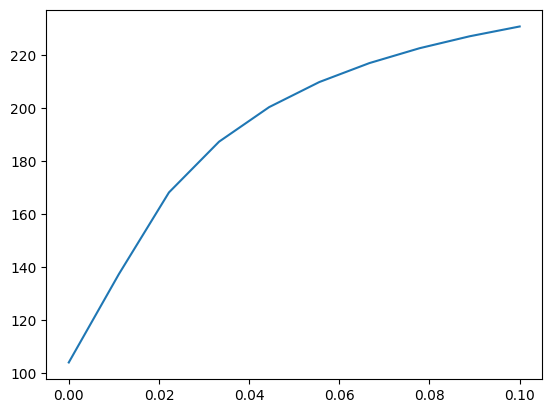

In [8]:
plt.plot(regs, res)